## Testing W/ XGBoost model

This was a test to see if removing the datasets of potential anomalies from the original data would improve model performance of a basic XGBoost model.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.impute import SimpleImputer


In [4]:
data_big = pd.read_csv('WOWTDR_prepdat.csv')

In [5]:
file_names = ['anoms_0.csv','anoms_1.csv','anoms_2.csv',
             'anoms_3.csv','anoms_4.csv','anoms_5.csv',
             'anoms_6.csv','anoms_7.csv','anoms_8.csv',
             'anoms_9.csv','anoms_10.csv','anoms_11.csv',
             'anoms_12.csv','anoms_13.csv','anoms_14.csv',
              'anoms_15.csv','anoms_16.csv','anoms_17.csv',
              'anoms_18.csv','anoms_19.csv','anoms_20.csv',
            'anoms_21.csv','anoms_22.csv','anoms_23.csv',
             'anoms_24.csv','anoms_25.csv','anoms_26.csv',
             'anoms_27.csv','anoms_28.csv','anoms_29.csv',
             'anoms_30.csv','anoms_31.csv','anoms_32.csv',
             'anoms_33.csv','anoms_34.csv','anoms_35.csv',
              'anoms_36.csv','anoms_37.csv','anoms_38.csv',
              'anoms_39.csv','anoms_40.csv','anoms_41.csv']

In [6]:
anomalies = []
for file_name in file_names:
    anoms = pd.read_csv(file_name,index_col=0)
    anomalies.append(anoms)

In [9]:
accuracy_scores = []
for i in range(len(anomalies)):
    data = data_big[['ID', 'obs','FAC_sqkm', 'elev','d_slp20_m', 'ppt_sum_yr_m_0', 'ppt_yr_m_0', 'seg_slope_perc', 'STRAHLER', 'SumUpSlpLen_km']]

    data = data.drop(anomalies[i].index)

    data.obs[data.obs=='Wet']=1
    data.obs[data.obs=='Dry']=0

    data['obs']=data.obs.apply(pd.to_numeric)
    
    X = data.drop(['obs','ID'],axis=1)
    y = data['obs']

    X_train,X_test,y_train,y_test = train_test_split(X,y)

    numerical_feats = ['FAC_sqkm','elev','d_slp20_m','ppt_sum_yr_m_0','ppt_yr_m_0','seg_slope_perc','SumUpSlpLen_km']
    categorical_feats = ['STRAHLER']
    
    num_processor = Pipeline(steps=[
    ('scaler', StandardScaler())  ])
    
    feat_processor = ColumnTransformer(transformers = [
    ('num_pipe', num_processor,numerical_feats)],remainder='drop')
    
    clf= xgb.XGBClassifier()

    pipe = Pipeline(steps=[
        ('feature_processor', feat_processor),
        ('clf', clf)
    ])
    pipe

    pipe.fit(X_train,y_train)
    
    parameters = {"clf__min_samples_leaf" : [1, 4,  8], # default 1
              "clf__min_samples_split" : [2, 4, 8], # default 2
              "clf__n_estimators" : [10, 25, 50, 100, 150], # default 100
              "clf__max_depth" : [2,5,10,15,20]} # default None (unlimited)

    grid = GridSearchCV(pipe, parameters,cv=5,scoring='accuracy',n_jobs=-1,verbose=True)
    grid.fit(X_train,y_train)
    
    best_clf=grid.best_estimator_
    
    y_test_pred = best_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test,y_test_pred))
    
    

C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:47:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:48:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:49:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:50:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:51:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:54:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:55:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:56:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:57:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:58:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[12:59:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:00:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:02:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:03:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:04:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:06:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:07:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:14:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:15:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:17:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:18:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:21:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:22:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:23:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:24:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:25:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


[13:26:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:27:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


[13:28:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:29:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:30:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Wet']=1
C:\Users\nakae\AppData\Local\Temp\ipykernel_18052\1287405829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.obs[data.obs=='Dry']=0


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[13:31:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



Text(0, 0.5, 'accuracy')

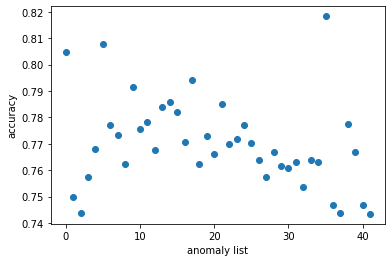

In [10]:
anom_list_total = np.linspace(0,41,42)
plt.scatter(anom_list_total, accuracy_scores)
plt.xlabel('anomaly list')
plt.ylabel('accuracy')

slight increase in accuracy peaking with the removal of approx anom_15